In [1]:
#Creation of list in pyspark
tempc = sc.parallelize([38.4, 19.2, 12.8, 9.6])

tempf = tempc.map(lambda x: (float(9)/5)*x + 32)

In [2]:
tempc

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195

In [4]:
tempc.collect()

[38.4, 19.2, 12.8, 9.6]

In [5]:
tempf.collect()

[101.12, 66.56, 55.040000000000006, 49.28]

In [6]:
#Immutable Sets in Pyspark
tempc = sc.parallelize(set([38.4, 19.2, 12.8, 9.6]))

tempc

ParallelCollectionRDD[2] at parallelize at PythonRDD.scala:195

In [7]:
tempc.collect()

[9.6, 19.2, 12.8, 38.4]

In [8]:
#Immutable sets in Python
tempc0 = frozenset([38.4, 19.2])

tempc1 = frozenset([12.8, 9.6])

tempc2 = frozenset([23.7, 9.6])

tempc1.intersection(tempc2)

frozenset({9.6})

In [9]:
tempc1.difference(tempc2)


frozenset({12.8})

In [10]:
tempc0.union(tempc1)


frozenset({9.6, 12.8, 19.2, 38.4})

In [11]:
#Tuples in pyspark
tempc = sc.parallelize([38.4, 19.2, 12.8, 9.6])

temp_tups = tempc.map(lambda x: (x,(float(9)/5)*x + 32))

temp_tups

PythonRDD[4] at RDD at PythonRDD.scala:53

In [12]:
temp_tups.take(4)


[(38.4, 101.12), (19.2, 66.56), (12.8, 55.040000000000006), (9.6, 49.28)]

In [13]:
#Dictonaries
dict0 = {'fname':'Jeff', 'lname':'Aven', 'pos':'author'}

dict1 = {'fname':'Barack', 'lname':'Obama', 'pos':'president'}

dict2 = {'fname':'Ronald', 'lname':'Reagan', 'pos':'president'}

dict3 = {'fname':'John', 'mi':'F', 'lname':'Kennedy', 'pos':'president'}

dict4 = {'fname':'Jeff', 'lname':'Aven', 'pos':'author'}
people = sc.parallelize([dict0, dict1, dict2, dict3])

people

ParallelCollectionRDD[7] at parallelize at PythonRDD.scala:195

In [14]:
people.collect()

[{'fname': 'Jeff', 'lname': 'Aven', 'pos': 'author'},
 {'fname': 'Barack', 'lname': 'Obama', 'pos': 'president'},
 {'fname': 'Ronald', 'lname': 'Reagan', 'pos': 'president'},
 {'fname': 'John', 'mi': 'F', 'lname': 'Kennedy', 'pos': 'president'}]

In [16]:
presidents = people.filter(lambda x: x['pos'] == 'president') \
.map(lambda x: x['fname'] + " " + x['lname'])

presidents.take(3)

['Barack Obama', 'Ronald Reagan', 'John Kennedy']

In [17]:
#Python object serialization
#JSON
import json
json_str = '''{

  "people" : [

    {"fname": "Jeff",

     "lname": "Aven",

     "tags": ["big data","hadoop"]},

    {"fname": "Doug",

     "lname": "Cutting",

     "tags": ["hadoop","avro","apache","java"]},

    {"fname": "Martin",

     "lname": "Odersky",

     "tags": ["scala","typesafe","java"]},

    {"fname": "John",

     "lname": "Doe",

     "tags": []}

    ]}'''
people_obj = json.loads(json_str)

people = sc.parallelize(people_obj["people"])


In [18]:
people

ParallelCollectionRDD[10] at parallelize at PythonRDD.scala:195

In [19]:
hadoop_tags = people.filter(lambda x: "hadoop" in x['tags']) \
.map(lambda x: x['fname'] + " " + x['lname'])

hadoop_tags.take(2)

['Jeff Aven', 'Doug Cutting']

In [20]:
#Object serialization using python
#PySpark uses PickleSerializer by default to serialize objects using cpickle
try:

    import cPickle as pickle

except:

    import pickle
    
obj = { "fname": "Jeff", \

        "lname": "Aven", \

        "tags": ["big data","hadoop"]}

str_obj = pickle.dumps(obj)

pickled_obj = pickle.loads(str_obj)

pickled_obj["fname"]


'Jeff'

In [22]:
pickled_obj["tags"].append('spark')
str(pickled_obj["tags"])

"['big data', 'hadoop', 'spark']"

In [23]:
pickled_obj_str = pickle.dumps(pickled_obj)


In [24]:
pickled_obj_str

b'\x80\x03}q\x00(X\x05\x00\x00\x00fnameq\x01X\x04\x00\x00\x00Jeffq\x02X\x05\x00\x00\x00lnameq\x03X\x04\x00\x00\x00Avenq\x04X\x04\x00\x00\x00tagsq\x05]q\x06(X\x08\x00\x00\x00big dataq\x07X\x06\x00\x00\x00hadoopq\x08X\x05\x00\x00\x00sparkq\teu.'

In [25]:
pickle.dump(pickled_obj, open('object.pkl', 'wb'))

In [35]:
#The PySpark Spark context includes two methods for handling pickled input and output files, pickleFile and saveAsPickleFile. 
file = sc.textFile("shakespeare.txt")
pklfile = file.saveAsPickleFile("C:/Spark_Examples/Hour9/pklfile")


In [36]:
#The pickleFile method is used to load a Spark RDD from a previously saved Pickle file. Note that the pickleFile method only works with Pickle files created and saved with the saveAsPickleFile PySpark method previously discussed.pklfile = sc.pickleFile("C:/Spark_Examples/Hour9/pklfile")

pklfile = sc.pickleFile("C:/Spark_Examples/Hour9/pklfile")
pklfile.count()

129107

In [37]:
# named function

def plusone(x): return x+1

plusone(1)

2

In [38]:
type(plusone)

function

In [39]:
# anonymous function

plusonefn = lambda x: x+1

plusonefn(1)


2

In [40]:
type(plusonefn)


function

In [51]:
plusonefn

<function __main__.<lambda>(x)>

In [55]:
plusone

<function __main__.plusone(x)>

In [57]:
#Higher-order .The flatMap, filter, map, and reduceByKey functions are higher order functions
lines = sc.textFile("shakespeare.txt")

counts = lines.flatMap(lambda x: x.split(' ')) \
.filter(lambda x: len(x) > 0) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.collect()

for (word, count) in counts:

    print("%s: %i" % (word, count))

MIDSUMMER-NIGHT'S: 1
Now: 741
Hippolyta: 6
nuptial: 21
apace: 25
four: 115
days: 181
bring: 385
in: 9471
Another: 22
;: 17274
but: 3686
O: 2186
!: 10526
methinks: 84
lingers: 4
step: 26
dowager: 5
Long: 30
withering: 2
out: 1215
young: 385
revenue: 18
.: 36514
Four: 14
quickly: 93
themselves: 147
night: 560
nights: 32
dream: 113
away: 668
And: 7217
like: 1530
silver: 52
New-bent: 1
behold: 110
Of: 950
solemnities: 1
Go: 492
Stir: 4
Athenian: 19
Awake: 15
nimble: 21
spirit: 242
of: 15037
Turn: 32
melancholy: 71
funerals: 3
The: 3511
pale: 117
companion: 39
is: 8318
pomp: 32
thy: 3456
love: 1810
But: 2434
wed: 36
Theseus: 6
renowned: 24
Thanks: 46
good: 2297
news: 310
?: 10197
child: 222
daughter: 410
Hermia: 36
Stand: 106
noble: 596
her: 3629
Lysander: 36
bewitch'd: 5
bosom: 122
Thou: 843
thou: 4501
hast: 536
rimes: 9
love-tokens: 1
moonlight: 8
at: 2203
verses: 19
stol'n: 37
impression: 9
hair: 112
rings: 12
gawds: 4
trifles: 15
messengers: 17
prevailment: 1
unharden'd: 1
daughter's: 2

hot: 142
ice: 18
wonderous: 1
ten: 124
therein: 44
rehears'd: 3
shed: 47
toil'd: 3
memories: 3
intents: 20
service: 217
anything: 69
simpleness: 4
wretchedness: 9
o'ercharg'd: 4
Takes: 8
purposed: 4
premeditated: 3
welcomes: 7
shiver: 1
periods: 1
midst: 10
accent: 15
conclusion: 29
dumbly: 2
paying: 5
rattling: 4
audacious: 6
eloquence: 10
capacity: 11
Consider: 13
despite: 38
points: 28
rid: 29
stop: 86
Indeed: 78
played: 14
chain: 61
impaired: 1
disordered: 1
Ninus': 1
grisly: 2
affright: 10
bloody: 211
finds: 36
blameful: 3
bravely: 31
broach'd: 4
mulberry: 2
twain: 35
asses: 6
hole: 25
secretly: 12
stone: 52
grim-look'd: 1
alack: 26
stand'st: 13
stones: 56
deceiving: 4
sensible: 22
kiss'd: 22
wall's: 1
Wilt: 68
'Tide: 1
walls: 58
wilful: 11
silliest: 1
theirs: 28
mouse: 14
floor: 4
goose: 28
carry: 78
circumference: 3
Myself: 51
greatest: 50
already: 139
aweary: 9
wane: 1
Proceed: 26
thorn-bush: 2
Oh: 11
sunny: 3
shining: 9
glittering: 7
streams: 10
duck: 9
Approach: 13
Cut: 14
Be

afford: 19
baring: 1
'Twould: 12
Hardly: 3
believed: 5
enemy's: 10
Throca: 1
movousus: 1
cargo: 5
Cargo: 1
corbo: 1
boskos: 1
German: 9
Dane: 9
discover: 29
Kerelybonto: 1
Betake: 1
seventeen: 6
revania: 1
dulche: 1
gather: 22
may'st: 4
secrets: 25
purposes: 40
damn: 15
Acordo: 1
muffled: 6
A': 18
safely: 23
monument: 32
barely: 3
bareness: 2
vow'd: 15
Highest: 2
witness: 102
attributes: 2
conditions: 26
unseal'd: 1
opinion: 82
Change: 7
holy-cruel: 1
integrity: 19
crafts: 3
begins: 52
ropes: 3
Bequeathed: 2
ancestors: 21
obloquy: 3
Remain: 4
deliver'd: 35
proceeds: 6
deeds: 107
think't: 1
shaking: 8
Especially: 5
incurred: 1
darkly: 7
perverted: 1
fleshes: 1
rebellion: 27
Merely: 7
reveal: 3
o'erflows: 1
dieted: 4
anatomized: 1
curiously: 4
overture: 5
altogether: 24
sanctimony: 4
residing: 3
tenderness: 13
stronger: 36
confirmed: 3
rector: 1
verity: 10
losses: 13
acquired: 1
mingled: 10
yarn: 2
offered: 13
tartness: 2
sixteen: 12
month's: 2
a-piece: 4
abstract: 5
conge'd: 1
convoy: 7

plenteous: 11
glean: 4
reaps: 1
heal: 13
riper: 1
mix'd: 6
damask: 5
answer'd: 36
censure: 29
drunkards: 6
emulation: 10
compounded: 7
extracted: 1
rumination: 1
wraps: 1
Traveller: 1
lisp: 3
disable: 2
gondola: 2
shoulder: 24
heart-whole: 1
tardy: 13
wooed: 6
armed: 27
prevents: 3
Virtue: 16
gravelled: 1
warn: 5
ranker: 3
talking: 23
Troilus: 84
dashed: 2
Leander: 4
Hero: 58
Hellespont: 4
'Hero: 1
worms: 18
Saturdays: 1
,'Will: 1
winged: 14
maids: 39
new-fangled: 2
inclined: 2
'Wit: 1
check: 23
husband's: 35
nurse: 71
jot: 21
hollow: 47
misused: 3
doublot: 1
plucked: 9
Portugal: 1
bastard: 58
deer's: 2
errand: 18
contents: 22
tenour: 17
swaggerer: 3
hare: 15
hunt: 30
freestone-colour'd: 1
verily: 6
invent: 5
defies: 1
blacker: 5
Phebes: 1
Mark: 87
railing: 8
vengeance: 49
aspect: 25
purlieus: 1
fenc'd: 1
West: 3
murmuring: 4
sends: 37
pacing: 1
befell: 3
bald: 17
gilded: 15
Seeing: 10
couching: 3
'mongst: 21
hurtling: 1
rescu'd: 9
Was't: 7
contrive: 8
Tears: 5
recountments: 1
array: 1

guilt: 27
belied: 5
carl: 1
subdu'd: 12
Knighthoods: 1
lout: 5
lane: 8
routs: 2
supplies: 4
betimes: 23
re-inforce: 1
full-hearted: 1
Lolling: 1
plentiful: 3
lengthen'd: 4
wall'd: 3
masks: 4
cas'd: 3
'Our: 2
Britain's: 2
backwards: 1
distaff: 3
lance: 14
,'gan: 1
grin: 6
chaser: 1
rout: 11
forthwith: 17
Chickens: 1
eagles: 8
victors: 5
voyages: 2
unguarded: 3
O'er-borne: 1
slaughter-man: 2
'Two: 2
Romans': 1
bane: 6
?This: 1
cups: 8
knives: 10
veriest: 4
ransom's: 1
lag: 5
peck'd: 1
Groan: 2
perpetuity: 3
unbar: 1
fetter'd: 4
shanks: 3
penitent: 14
stricter: 1
clement: 1
tenth: 8
Imogen's: 1
coin'd: 2
'Tween: 3
figure's: 1
Rates: 1
orphans': 3
Lucina: 3
throes: 4
ript: 1
crying: 21
ancestry: 4
Moulded: 1
Leonati's: 1
taint: 13
geck: 2
other's: 30
seats: 5
country's: 45
fealty: 5
Tenantius': 1
maintain: 38
hardiment: 3
adjourn'd: 1
exercise: 19
race: 15
Peep: 2
marble: 13
appeal: 18
batters: 3
coasts: 2
Elysium: 6
never-withering: 1
opprest: 1
delay'd: 4
delighted: 4
trials: 3
Rise: 11


daws: 6
III: 2
pail: 2
nipp'd: 1
IV: 3
coughing: 2
brooding: 1
crabs: 2
FOR: 1
institutions: 1
Elected: 1
Lent: 5
drest: 2
Vienna: 10
observer: 2
Fully: 1
torches: 8
Spirits: 4
determines: 3
advertise: 2
Mortality: 1
test: 4
leaven'd: 1
admit: 18
qualify: 7
Aves: 1
instructed: 5
dukes: 12
Hungary: 1
sanctimonious: 2
Commandments: 1
scraped: 1
'Thou: 5
three-piled: 1
Mitigation: 1
healthy: 2
fooling: 10
promise-keeping: 1
custom-shrunk: 1
Groping: 1
houses: 21
resort: 14
suburbs: 8
seed: 7
burgher: 1
clients: 2
trade: 42
considered: 6
Thomas: 53
Fellow: 13
Authority: 4
Lucio: 10
rats: 8
morality: 1
lechery: 13
denunciation: 1
propagation: 1
Unhappily: 1
glimpse: 2
governor: 18
fills: 11
Awakes: 2
penalties: 2
milkmaid: 2
prosperous: 24
grievous: 25
imposition: 7
enjoying: 5
tick-tack: 1
dribbling: 1
wrinkled: 12
assemblies: 2
witless: 3
stricture: 1
travell'd: 8
Poland: 5
biting: 10
curbs: 4
headstrong: 10
birch: 1
Goes: 9
tied-up: 1
Sith: 7
permissive: 1
impos'd: 2
Supply: 2
formally: 

Sooth: 5
Helicanus: 14
flatterer: 14
minister'st: 1
careful: 23
protector: 28
listening: 5
blackness: 4
Musings: 1
Freely: 4
mingle: 12
Intend: 3
subjects': 6
show'dst: 2
peers: 38
sufficiently: 3
unlicens'd: 1
correct: 7
shipman's: 2
'scap'd: 9
landing: 2
Commended: 1
Dionyza: 6
relating: 1
digs: 2
aspire: 5
famish: 9
towers: 10
adorn'd: 1
palates: 5
summers: 7
darlings: 2
lots: 4
prosperities: 1
riots: 7
hitherward: 6
glory's: 2
flags: 3
favourers: 2
untutor'd: 2
Trojan: 32
needy: 6
Greece: 21
harbourage: 2
benign: 1
troubles: 14
benison: 4
speken: 1
Build: 1
statue: 15
Helicane: 5
fulfil: 4
Thunder: 1
unquiet: 7
waves: 18
perishen: 1
Threw: 4
substance: 38
bereft: 16
Pilch: 1
porpus: 1
Simonides: 8
finny: 1
fishers: 2
recollect: 1
tennis-court: 1
holidays: 2
moreo'er: 1
Pentapolis: 5
tourney: 2
bots: 3
rusty: 9
'Keep: 1
!'t: 1
calm'd: 5
sovereign's: 11
condolements: 1
vails: 1
furtherance: 3
rapture: 3
biding: 3
unprovided: 7
goal: 4
triumphs: 10
gat: 1
renowns: 1
reaching: 2
tua: 1

Bellario: 8
ferry: 1
trades: 4
prettier: 1
mincing: 4
question's: 2
agitation: 2
enow: 7
pork-eaters: 1
converting: 2
Jews: 1
negro's: 1
Garnish'd: 2
cheer'st: 1
expressing: 2
Pawn'd: 1
'mong: 3
stony: 7
adversary: 6
envy's: 3
quietness: 7
strange-apparent: 1
exact'st: 1
merchant's: 5
Glancing: 1
huddled: 1
Enow: 1
brassy: 1
Turks: 7
Sabbath: 2
sways: 8
wauling: 1
inevitable: 4
pines: 4
gusts: 6
offers: 10
conveniency: 2
wether: 2
Drops: 2
earnestly: 9
hangman's: 2
keenness: 1
inexecrable: 1
waver: 1
Pythagoras: 3
trunks: 4
currish: 5
lay'st: 3
wolfish: 1
ravenous: 5
offend'st: 1
Repair: 7
cureless: 2
attendeth: 1
Bellario's: 1
,comes: 1
importunity: 3
acceptance: 6
impugn: 1
droppeth: 1
blesseth: 1
mitigate: 3
Nearest: 1
appeareth: 2
repents: 3
Entreat: 5
Barabbas: 1
awards: 2
rightful: 13
Shed: 5
twentieth: 2
enacted: 3
alien: 2
incurr'd: 2
whereby: 8
recant: 1
Clerk: 1
christening: 4
'scuse: 2
overtake: 7
Shylock's: 1
o'ertrip: 1
waft: 6
Medea: 2
forgave: 2
out-night: 1
footing: 14


beareth: 1
part's: 1
hearkening: 1
scrivener: 1
pittance: 1
Lucentio's: 3
Dally: 1
deceitful: 6
busied: 5
privilegio: 2
imprimendum: 1
solum: 1
parsley: 1
Evermore: 4
Forward: 3
spangle: 1
Happier: 2
favourable: 5
bedazzled: 1
untoward: 2
crack-hemp: 1
worshipful: 5
scarlet: 10
university: 2
sailmaker: 1
Bergamo: 1
murdered: 7
forthcoming: 3
brav'd: 5
depth: 7
overblown: 2
Roundly: 1
Conceives: 2
Measures: 2
respecting: 1
hasty-witted: 1
awaken'd: 1
simile: 1
hunted: 5
gird: 4
maim'd: 4
outright: 4
halves: 1
Intolerable: 1
conferring: 1
Swinge: 1
threatening: 6
meads: 5
whirlwinds: 2
Muddy: 1
ill-seeming: 1
maintenance: 3
commits: 2
Unapt: 2
TEMPEST: 1
Boatswain: 1
yarely: 2
aground: 1
bestir: 2
Heigh: 2
topsail: 1
Tend: 3
boson: 1
cabin: 9
!Out: 1
cable: 4
main-course: 1
bawling: 1
incharitable: 1
noisemaker: 1
leaky: 2
cheated: 2
wide-chapp'd: 1
tides: 5
gape: 11
wid'st: 1
furlongs: 2
acre: 3
heath: 3
Dashes: 1
Dash'd: 1
sunk: 3
fraughting: 1
Prospero: 11
.So: 1
compassion: 9
perditi

horseman: 1
footman: 5
horseman's: 1
ape-bearer: 1
tinker's: 1
Prig: 1
prig: 1
good-faced: 1
unrolled: 1
jog: 1
footpath: 2
stile-a: 1
mile-a: 1
April's: 2
swain's: 1
feeders: 3
Digest: 2
flaunts: 1
sternness: 1
Apprehend: 1
Humbling: 1
deities: 3
fire-rob'd: 1
transformations: 1
lusts: 4
Oppos'd: 3
Strangle: 1
Lift: 3
Address: 2
rue: 17
garden's: 1
piedness: 1
shares: 4
mints: 1
savory: 1
marjoram: 2
maidenheads: 3
Dis's: 1
March: 34
unmarried: 1
Bright: 2
flower-de-luce: 3
Doricles: 4
low-born: 1
green-sord: 1
smacks: 1
curds: 3
Mopsa: 2
tunes: 7
doleful: 5
sizes: 2
milliner: 2
burthens: 1
dildos: 1
unbraided: 1
cambrics: 1
pedlars: 1
Cyprus: 25
Gloves: 1
Masks: 1
necklace-amber: 1
Perfume: 1
Pins: 2
poking-sticks: 1
lasses: 1
milking-time: 1
behoves: 2
Taleporter: 1
woll: 1
go'st: 8
Pedlar: 1
fin'st: 3
wear-a: 1
ware-a: 1
neat-herds: 1
Saltiers: 1
herdsmen: 2
squier: 1
knacks: 1
treasury: 6
marted: 1
Interpretation: 2
Ethiopian's: 1
Contract: 1
stupid: 1
sceptre's: 3
affect'st: 2
sh

Ungracious: 1
caves: 6
preach'd: 1
Rudesby: 1
botch'd: 2
started: 4
dissembled: 2
wittily: 1
Gorboduc: 1
clerestories: 1
errest: 1
findest: 1
Fool: 9
perdy: 4
propertied: 3
Well-a-day: 1
Vice: 2
lath: 5
Pare: 1
dad: 3
enwraps: 1
chantry: 1
Plight: 1
negatives: 1
Primo: 1
triplex: 1
Bennet: 2
bawbling: 1
hulk: 4
Candy: 1
Titus: 46
brabble: 2
Notable: 1
mercies: 3
Taught: 2
vacancy: 4
hushes: 1
perverseness: 1
faithfull'st: 1
non-regardance: 1
screws: 1
Punish: 1
propriety: 2
Attested: 1
interchangement: 1
cub: 1
grizzle: 1
incardinate: 1
lifelings: 1
bespake: 1
Sot: 1
pavin: 1
thin-faced: 1
clad: 4
Viola: 3
thirteen: 5
over-swear: 1
orbed: 2
severs: 1
Belzebub: 2
madman's: 4
vox: 1
MADLY-USED: 1
MALVOLIO: 1
Notorious: 1
cross-garter'd: 1
presuppos'd: 1
Taint: 2
'By: 3
whirligig: 1
convents: 1
combination: 3
tiny: 4
HISTORY: 1
molley: 1
goodness': 2
happiest: 4
Stay'd: 2
suns: 9
Andren: 1
Arde: 1
chamber's: 1
Show'd: 5
heralds: 7
fabulous: 2
discourser: 1
action's: 1
disposing: 4
rebell'

Rescu'd: 2
bloom'd: 1
Recover'd: 1
procession: 3
statelier: 1
pyramis: 1
Memphis: 1
urn: 3
Darius: 1
Transported: 2
Sergeant: 1
servitors: 2
Constrain'd: 1
Artois: 1
Picardy: 2
banqueted: 1
Contriv'd: 1
Ascend: 4
relieving: 1
Leap: 3
refuge: 6
trull: 4
applauded: 1
Auvergne: 1
comic: 2
oratory: 4
over-rul'd: 2
unbidden: 1
welcomest: 1
Porter: 1
crav'd: 1
strong-knit: 2
certify: 1
Prisoner: 1
blood-thirsty: 1
captivate: 2
Laughest: 1
riddling: 2
subverts: 1
bruited: 3
Temple: 3
Somerset: 66
significants: 1
Prick: 5
Pole: 13
conversing: 2
Clarence: 88
crestless: 1
yeomen: 3
place's: 1
Cambridge: 11
attained: 1
blood-drinking: 3
Kind: 11
Nestor-like: 1
Wax: 1
exigent: 3
pithless: 1
sapless: 2
Unable: 1
Swift-winged: 1
ignobly: 4
Fourth: 9
Depos'd: 2
first-begotten: 1
Percies: 1
usurpation: 3
Endeavour'd: 1
derived: 1
pedigree: 4
weening: 1
Mortimers: 1
suppress'd: 3
admonishments: 1
giveth: 1
overpass'd: 1
Keepers: 1
Chok'd: 2
restored: 4
Com'st: 3
intend'st: 1
Verbatim: 1
Lascivious: 4
b

Figuring: 1
falseness: 1
stirrer: 1
rood: 5
god-daughter: 1
Ellen: 1
ousel: 1
inns: 3
'lusty: 1
Staffordshire: 1
Pickbone: 1
Squele: 1
Cotswold: 2
swinge-bucklers: 1
bona-robas: 1
Sampson: 1
fruiterer: 1
Gray's: 1
backsword: 1
'Phrase: 1
drudgery: 1
muster-book: 1
Wart: 6
Bullcalf: 7
ringing: 1
Nightwork: 3
bona-roba: 1
fifty-five: 2
chimes: 1
watchword: 1
Jesus: 3
Corporate: 1
dame's: 1
likeliest: 1
assemblance: 1
pewterer's: 1
bucket: 3
Wart's: 1
tester: 1
Dagonet: 1
'rah: 1
tah: 2
'bounce: 1
cheese-paring: 1
sware: 2
eel-skin: 1
dace: 1
Forest: 1
investments: 2
greaves: 1
pens: 3
obstructions: 1
establish: 4
Concurring: 1
Norfolk's: 2
well-remember'd: 1
coursers: 3
warder: 2
dint: 2
overween: 1
redress'd: 2
insinew'd: 1
Acquitted: 1
false-derived: 1
enrooted: 1
unfasten: 1
atonement: 2
Cheering: 1
monarch's: 2
workings: 2
misorder'd: 1
Hydra: 3
after-times: 1
lavishly: 1
Wrested: 1
redresses: 2
trains: 3
steers: 2
Fondly: 1
travel-tainted: 1
booked: 1
Retreat: 1
over-cool: 1
inflamm

distraught: 2
tragedian: 1
drawbridge: 1
daub'd: 1
shelter'd: 1
Guildhall: 2
Infer: 2
bestial: 2
well-learned: 1
Shaw: 1
engross'd: 1
Touch'd: 1
Untouch'd: 1
aldermen: 1
dallying: 2
props: 2
Deferr'd: 1
shoulder'd: 1
Unmeritable: 1
care-craz'd: 1
Seduc'd: 1
declension: 2
bigamy: 1
true-derived: 1
Loath: 1
egally: 1
;farewell: 1
dead-killing: 1
unwise: 3
ill-dispersing: 1
cockatrice: 2
Grossly: 1
thrice-renowned: 1
positively: 2
iron-witted: 1
considerate: 2
High-reaching: 1
untir'd: 2
Tear-falling: 1
Foes: 1
troublest: 1
repays: 3
suborn: 1
'Oh: 1
'almost: 1
Abraham's: 1
Breton: 2
increaseth: 2
rash-levied: 1
unblown: 1
Hover: 3
craz'd: 3
grave's: 2
Unlawfully: 1
seniory: 1
holp'st: 2
hellhound: 1
worry: 1
defacer: 1
true-disposing: 1
Preys: 1
pew-fellow: 1
Match: 1
a-high: 1
whirl'd: 1
Usurp: 1
Revolving: 1
Windy: 1
intestate: 1
Hid'st: 1
Rail: 2
exclamations: 1
Tetchy: 1
Abides: 1
lanc'd: 2
stone-hard: 1
anchor'd: 1
demise: 1
endow: 1
Mad'st: 1
after-hours: 1
Repair'd: 1
chastised: 2

meiny: 1
,drew: 1
unremovable: 1
Fiery: 2
Inform'd: 1
Infirmity: 1
headier: 1
indispos'd: 1
remotion: 2
'Down: 1
adult'ress: 1
discerns: 1
serpent-like: 1
vengeances: 1
lameness: 1
fen-suck'd: 1
tender-hefted: 1
easy-borrow'd: 1
Dwells: 1
stock'd: 1
Necessity's: 1
squire-like: 1
guardians: 1
depositaries: 1
beast's: 1
unquietly: 1
Contending: 2
'bove: 3
to-and-fro-conflicting: 1
cub-drawn: 1
belly-pinched: 1
out-jest: 1
Thron'd: 1
snuffs: 1
packings: 1
bemadding: 1
,show: 1
hurricanoes: 1
steeples: 1
thought-executing: 1
Vaunt-couriers: 1
oak-cleaving: 1
moulds: 1
germens: 2
holy-water: 1
rain-water: 1
subscription: 1
wanderers: 1
undivulged: 1
Unwhipp'd: 1
guilts: 1
Rive: 1
summoners: 1
sinning: 1
bare-headed: 1
heretics: 2
cutpurses: 1
Invades: 1
houseless: 2
loop'd: 1
Fathom: 1
whirlpool: 1
four-inched: 1
starblasting: 1
Couldst: 1
pendulous: 1
Judicious: 1
halloo: 1
loo: 2
out-paramoured: 1
lenders': 1
Dolphin: 1
sophisticated: 1
lecher's: 1
harelip: 1
night-mare: 1
alight: 1
tadpo

reliances: 1
resumes: 1
Contain: 1
long-since-due: 1
unagreeable: 1
gramercy: 2
outrunn'st: 1
exactest: 1
auditors: 1
bray'd: 1
Feast-won: 1
fast-lost: 1
Unwisely: 1
Secure: 3
Assurance: 1
Flaminius: 7
Servilius: 8
corporate: 1
intending: 1
distasteful: 1
cak'd: 1
ingenuously: 1
respectively: 1
'nothing: 1
towardly: 1
solidares: 1
requesting: 1
monstrousness: 1
Religion: 2
Hortensius: 1
Philotus: 1
recoverable: 1
wondrously: 1
emboldens: 1
behave: 1
manslaughter: 1
misbegot: 1
Byzantium: 1
rioter: 1
Security: 1
receive't: 1
captains': 1
Banishment: 1
godheads: 1
suitable: 1
Uncover: 1
sprinkles: 1
destroyers: 1
trencher-friends: 1
Push: 1
Bankrupts: 1
pill: 1
night-rest: 1
Instruction: 1
Plagues: 1
fevers: 1
Cripple: 1
That'gainst: 1
familiars: 1
Slink: 1
procreation: 1
deny't: 1
Ducks: 1
Roots: 1
breah: 1
wappen'd: 1
spital-house: 1
embalms: 1
putt'st: 1
theif: 1
Misanthropos: 1
canons: 1
Voic'd: 1
regardfully: 1
Timandra: 3
baths: 1
tub-fast: 1
calamities: 1
,here's: 1
,go: 1
high-vi

'Fair: 5
'I: 49
tremble: 31
;': 89
plainly: 17
hard: 155
chamber: 88
almanack: 3
Yes: 177
thorns: 12
lanthorn: 13
present: 236
Moonshine: 5
wall: 53
talk: 181
Wall: 8
loam: 5
whisper: 28
sit: 183
begin: 104
cue: 12
home-spuns: 1
cradle: 14
.Thisby: 1
odious: 10
odours: 3
e'er: 87
Must: 134
noise: 88
Most: 194
radiant: 8
red: 57
juvenal: 7
Jew: 65
tire: 13
Ninny's: 3
'Ninus': 1
'never: 3
Pray: 183
hound: 12
hog: 7
headless: 5
neigh: 7
bark: 44
burn: 69
knavery: 18
ass-head: 2
Bless: 20
bless: 87
afraid: 41
ousel-cock: 1
throstle: 2
note: 140
wren: 6
quill: 2
angel: 47
flowery: 4
plain-song: 3
many: 518
nay: 103
wit: 251
Mine: 75
view: 70
Methinks: 65
together: 238
now-a-days: 3
honest: 274
wise: 157
beautiful: 13
remain: 55
tend: 20
fairies: 22
while: 189
airy: 11
Pease-blossom: 5
Moth: 5
Mustardseed: 1
gambol: 3
apricocks: 2
dewberries: 1
grapes: 7
figs: 4
night-tapers: 1
crop: 9
light: 252
butterflies: 4
fan: 13
moonbeams: 1
Nod: 2
Hail: 41
worship's: 11
acquaintance: 34
Master: 333
P

hopes: 56
education: 10
dispositions: 6
inherits: 2
fairer: 34
commendations: 14
virtues: 50
derives: 3
brine: 7
sorrows: 40
affect: 23
Moderate: 1
excessive: 1
grief: 208
excess: 12
holy: 181
succeed: 15
Contend: 3
empire: 16
few: 59
Under: 83
check'd: 4
furnish: 20
servants: 42
Carries: 2
Bertram's: 1
undone: 54
star: 41
radiance: 2
itself: 242
'Twas: 54
table: 39
trick: 50
he's: 207
steely: 2
bleak: 6
Cold: 12
wisdom: 93
superfluous: 17
defence: 38
Unfold: 4
war-like: 54
resistance: 3
blow: 84
underminers: 1
military: 8
blown: 34
quicklier: 1
blowing: 7
commonwealth: 28
preserve: 27
.'Tis: 3
for't: 48
accuse: 32
mothers: 19
infallible: 5
hangs: 35
murders: 14
buried: 53
highways: 2
sanctified: 6
limit: 16
desperate: 58
breeds: 20
mites: 1
cheese: 12
paring: 1
peevish: 29
self-love: 3
inhibited: 2
sin: 152
canon: 6
by't: 3
goodly: 77
principal: 10
liking: 27
commodity: 14
gloss: 12
less: 209
vendible: 2
wears: 37
richly: 11
suited: 7
withered: 9
pears: 1
eats: 17
drily: 1
formerly: 6

slightest: 3
shepherd: 52
searching: 4
cow's: 1
dugs: 3
chopped: 4
milked: 1
peascod: 3
'Wear: 1
shins: 4
Peace: 135
betters: 12
shear: 2
fleeces: 1
hospitality: 1
sheepcote: 2
cottage: 4
feeder: 5
bird's: 4
suck: 24
eggs: 7
stanzo: 1
dog-apes: 1
beggarly: 10
Sirs: 18
disputable: 1
boast: 29
warble: 1
gets: 12
yesterday: 24
Ducdame: 1
'ducdame: 1
Greek: 27
banquet: 21
Live: 24
mocker: 4
cheerly: 8
transform'd: 5
nowhere: 3
motley: 8
'No: 14
Says: 6
'It: 3
rot: 18
Motley's: 1
brain: 74
,he: 8
mangled: 13
ambitious: 33
galled: 8
'why': 1
church: 60
hit: 59
Invest: 1
Cleanse: 2
counter: 4
mischievous: 2
brutish: 6
sting: 25
licence: 10
party: 45
hugely: 1
ebb: 15
city-woman: 1
basest: 11
bravery: 6
Thinking: 6
mettle: 27
taxing: 2
Forbear: 14
civility: 5
seem'st: 6
nurture: 1
fruit: 35
commandment: 15
inaccessible: 2
wip'd: 7
bell: 32
minister'd: 6
doe: 7
Oppress'd: 3
bit: 7
theatre: 6
woful: 4
pageants: 5
merely: 19
entrances: 1
ages: 12
infant: 21
Mewling: 1
puking: 1
whining: 4
Unwilli

wave: 9
Behind: 7
queen's: 32
cooks: 3
hasty: 19
Clotens: 2
blazon'st: 1
zephyrs: 1
enchaf'd: 1
rud'st: 1
royalty: 24
untaught: 5
it's: 19
hostage: 2
lamenting: 6
skipp'd: 1
crutch: 11
ooze: 5
easiliest: 1
Stark: 1
tickled: 4
Reposing: 1
leagu'd: 2
brogues: 1
lasts: 4
azur'd: 2
hare-bell: 1
veins: 27
ruddock: 1
sore-shaming: 1
rich-left: 1
,bring: 1
winter-ground: 1
wench-like: 1
priests: 14
fanes: 1
rotting: 1
'tween: 11
Thersites': 1
Ajax': 1
chimney-sweepers: 2
lightning-flash: 1
thunder-stone: 2
witchcraft: 16
unlaid: 2
consummation: 2
'bout: 4
strewings: 1
fitt'st: 1
herblets: 1
strew: 13
bed-fellow: 4
fumes: 2
Mercurial: 1
Jovial: 2
Hecuba: 13
Greeks: 26
Conspir'd: 1
Damn'd: 4
Struck: 4
main-top: 1
lucre: 2
pregnant: 15
Murderous: 1
horrider: 1
senate: 29
stirr'd: 11
Sienna's: 1
captains: 15
,thus: 1
spongy: 4
sins: 35
Success: 4
building: 8
crave: 44
demanded: 9
alter'd: 16
picture: 39
complaining: 5
Richard: 154
.Say: 2
master'd: 3
Sent: 12
consul: 27
pickaxes: 1
century: 2
lea

Mended: 1
intemperate: 2
Release: 1
debatement: 2
confutes: 2
surfeiting: 4
suborn'd: 7
blemish: 8
imports: 9
ripen'd: 4
wrapt: 1
unbelieved: 1
blasting: 2
scandalous: 2
swing'd: 3
soundly: 21
temporary: 1
vouches: 2
misreport: 1
Whensoever: 1
disproved: 1
impartial: 5
depose: 8
Isabel's: 1
belock'd: 1
garden-house: 2
Carnally: 1
disvalu'd: 1
Tuesday: 7
confixed: 1
instruments: 26
Compact: 1
well-warranted: 1
chastisement: 8
slanderers: 1
Cucullus: 1
privately: 6
ashamed: 15
denies: 11
Respect: 1
Boldly: 2
unreverend: 3
unhallow'd: 9
touse: 1
provincial: 1
looker-on: 4
boil: 5
o'er-run: 3
forfeits: 4
bald-pate: 1
notedly: 1
treasonable: 1
resists: 1
foh: 7
bald-pated: 1
knave's: 8
session: 7
Immediate: 2
strangeness: 10
Attorney'd: 1
Labouring: 3
slower: 3
brain'd: 1
new-married: 3
approaching: 4
criminal: 3
promise-breach: 1
audible: 2
Measure: 6
imputation: 7
reproach: 16
possessions: 5
confiscation: 1
o'ertake: 5
perish'd: 3
Intents: 1
unprofitable: 5
bethought: 5
squar'st: 1
fellow

goldsmith's: 1
confederates: 8
trusts: 4
chain'd: 3
chargeful: 1
debted: 1
discharg'd: 10
Disburse: 1
dalliance: 7
shrew: 12
Arrest: 3
fraughtage: 2
aqua-vit: 5
Dowsabel: 1
austerely: 2
Look'd: 5
meteors: 6
Ill-fac'd: 1
wail'd: 2
buff: 4
back-friend: 1
shoulder-clapper: 1
countermands: 1
alleys: 2
creeks: 1
dryfoot: 1
fondly: 8
Conceit: 4
commodities: 3
imaginary: 7
Lapland: 1
Paradise: 2
calf's: 1
Prodigal: 4
base-viol: 1
tired: 10
fob: 2
exploits: 6
illusions: 2
spoon-meat: 1
bespeak: 6
spoon: 4
Avoid: 4
cherry-stone: 1
'Fly: 1
demean: 2
rush'd: 5
harshly: 3
heats: 1
prophesy: 19
'Beware: 1
incivility: 1
Revel: 2
remain'd: 2
Perdy: 1
revil'd: 2
Certes: 1
rope-maker: 1
requir'd: 8
idly: 15
Straight: 7
hereof: 4
Beside: 9
priory: 1
spoil'd: 6
Stray'd: 1
Namely: 3
roughly: 5
venom: 17
upbraidings: 2
Unquiet: 1
moping: 2
comfortless: 5
distemperatures: 1
life-preserving: 1
scar'd: 2
syrups: 2
beseem: 5
separate: 3
prostrate: 6
Beheaded: 1
outrageous: 6
hurried: 5
Doing: 7
ireful: 4
Chas'

swinged: 5
poys: 2
un: 2
paysan: 1
dissolve: 6
unduteous: 1
evitate: 1
pheeze: 2
Slys: 1
chronicles: 6
paucas: 1
pallabris: 1
Sessa: 2
denier: 3
Jeronimy: 1
third-borough: 1
Third: 7
borough: 2
Merriman: 1
emboss'd: 2
Clowder: 1
brach: 5
Silver: 3
Bellman: 1
scent: 3
Grim: 1
delicious: 3
Carry: 7
rose-water: 1
bestrew'd: 1
ewer: 2
diaper: 1
naturally: 4
Soto: 1
over-eyeing: 1
Barthol'mew: 1
drunkard's: 1
'madam: 1
onion: 2
raiment: 7
Christophero: 2
Sly: 5
Christopher: 2
Burtonheath: 1
cardmaker: 1
bear-herd: 2
ale-wife: 1
Wincot: 2
sheer: 2
lyingest: 2
bestraught: 1
droop: 5
caged: 1
Semiramis: 3
bestrew: 2
studded: 1
hawks: 3
soar: 7
shrill: 5
stags: 2
fleeter: 1
bleeds: 7
waning: 4
nap: 4
Sometimes: 8
Stephen: 5
Henry: 169
Pimpernell: 1
undress: 1
congeal'd: 2
harms: 15
Vincentio: 17
Bentivolii: 1
specially: 2
satiety: 3
devote: 1
abjur'd: 2
logic: 1
Katharina: 8
Hortensio: 29
mould: 8
three-legg'd: 1
froward: 10
Baptista: 25
mew: 4
taketh: 1
cake's: 1
dough: 2
brooked: 1
toucheth: 

rake: 4
heaviest: 6
Urge: 6
grievances: 6
Recking: 1
befortune: 1
Patrick's: 3
dining-chamber: 1
capon's: 2
'Hang: 1
'You: 3
''twas: 1
squirrel: 2
Stay'st: 1
despiseth: 2
true-confirmed: 1
profan'd: 3
forsook: 7
looking-glass: 6
acted: 7
Wept: 2
auburn: 1
forehead's: 1
worshipp'd: 6
scratch'd: 4
unseeing: 1
abbey-wall: 1
rounder: 1
Laurence: 3
mischances: 1
halloing: 1
approacheth: 3
tender't: 1
Inconstancy: 1
disgrac'd: 8
Cancel: 3
unrivall'd: 1
endu'd: 1
WINTERS: 1
Bohemia: 24
Verily: 5
insufficience: 1
childhoods: 1
attorneyed: 1
embassies: 2
Mamilhus: 1
multiply: 1
you': 1
Press: 2
drag: 8
Tongue-tied: 2
Charge: 3
Bohemia's: 2
by-gone: 2
thwack: 2
distaffs: 1
Leontes: 9
'verily': 1
lordings: 1
frisk: 1
'not: 3
tripp'd: 1
Temptations: 1
spok'st: 2
cram's: 1
tongueless: 4
ride's: 1
earn'd: 3
mingling: 2
tremor: 1
cordis: 1
heartiness: 1
palms: 2
mort: 1
Mamillius: 2
cleanly: 4
blacks: 1
fixes: 1
wolkin: 1
collop: 2
?may't: 1
fellow'st: 1
Looking: 6
recoil: 4
squash: 2
varying: 3
Appa

Diomed's: 2
false-hearted: 1
leers: 1
hisses: 1
foretell: 3
Roguery: 1
Guardian: 1
potato: 1
cognition: 1
norial: 1
waiting-women: 2
challeng'd: 5
plagu'd: 3
directs: 1
Minds: 1
publishing: 1
esperance: 2
obstinately: 1
deceptions: 1
Created: 2
critics: 1
depravation: 1
swagger: 5
Bi-fold: 1
Divides: 2
wider: 3
Admits: 1
fractions: 2
casque: 3
hurricano: 1
dizzy: 3
concupy: 1
croak: 1
almond: 1
admonishment: 1
Consort: 2
turbulence: 1
offerings: 4
precious-dear: 1
venom'd: 5
ruthful: 2
ruth: 3
foresee: 6
dutiful: 2
bodements: 2
shrills: 1
anticks: 1
edifies: 1
whoremasterly: 1
sleeveless: 1
miscall: 2
wenching: 1
chastis'd: 3
Margarelon: 1
Doreus: 1
colossus-wise: 1
corses: 2
Amphimachus: 1
Palamedes: 1
Sore: 1
snail-pac'd: 2
Galathe: 1
sculls: 1
strawy: 1
mower's: 1
swath: 2
Dexterity: 1
obeying: 1
Myrmidons: 4
hack'd: 6
foams: 3
Roaring: 1
frush: 1
fellest: 2
cuckold-maker: 2
double-henned: 1
putrefied: 1
darking: 1
o'erspreads: 1
stickler-like: 1
armies: 11
Along: 3
bragless: 1
murd

soothers: 1
justling: 1
sight-holes: 1
loop: 2
o'erturn: 2
topsy-turvy: 1
Vernon: 5
comrades: 1
daff'd: 1
plum'd: 1
cushes: 1
frosty: 7
Sutton-Co'fil': 1
coinage: 2
Lieutenant: 8
gurnet: 1
damnably: 1
caliver: 3
bellies: 2
dishonourable: 5
tattered: 1
prodigals: 1
scarecrows: 1
tacked: 1
herald's: 2
Alban's: 14
Warwickshire: 3
vigilant: 3
powder: 9
encamped: 1
Drag: 2
Vernon's: 1
hostility: 3
Audacious: 1
confesseth: 1
six-and-twenty: 1
outlaw: 2
Swore: 1
boroughs: 1
bridges: 2
lanes: 2
proffer'd: 6
edicts: 2
depriv'd: 4
Sought: 2
Broke: 3
quick-raised: 1
Meets: 1
Glendower's: 1
o'er-rul'd: 1
bloodily: 4
busky: 1
southern: 4
Foretells: 2
portent: 1
Rebellion: 3
sufferances: 1
Useth: 1
market-crosses: 1
hurlyburly: 1
innovation: 3
water-colours: 1
active-valiant: 1
valiant-young: 1
Suspicion: 3
misquote: 1
oath-breaking: 1
forswearing: 2
haughty: 13
Henry's: 47
Trimm'd: 2
cital: 1
dial's: 3
crossest: 1
yielder: 2
Semblably: 1
unreveng'd: 2
gett'st: 2
carbonado: 3
grinning: 3
rebels': 4


borrower's: 1
Japhet: 1
certificate: 1
misuses: 1
Ephesians: 1
Sup: 1
aprons: 5
prentice: 2
brighten: 1
tardily: 1
unseconded: 1
disadvantage: 2
apple-johns: 2
Johns: 1
supped: 1
pulsidge: 1
gluttony: 2
brooches: 1
conger: 2
toasts: 1
pacify: 1
,'Neighbour: 1
;Master: 1
Dumbe: 1
'receive: 1
:you: 1
cheater: 4
Cheater: 1
pistol-proof: 1
cheating: 1
lack-linen: 1
cuttle: 1
bottle-ale: 1
Discharge: 3
tearing: 4
whore's: 2
Hiren: 2
Peesel: 1
pack-horses: 1
give's: 1
tormente: 1
sperato: 1
contento: 1
ceteras: 1
'Thrust: 1
Galloway: 1
shovegroat: 1
Untwine: 1
tirrits: 1
rascal's: 2
chipped: 1
mallet: 1
bigness: 1
quoits: 1
fennel: 2
candles': 1
flapdragons: 1
joint-stools: 2
avoirdupois: 1
nave: 3
clawed: 1
kirtle: 1
cntinents: 1
candle-mine: 1
dispraised: 1
irrecoverable: 1
Lucifer's: 1
privykitchen: 1
roast: 4
maltworms: 1
outbids: 1
victuallers: 1
unpicked: 1
peascod-time: 1
truer-hearted: 1
cribs: 1
lull'd: 1
leav'st: 1
watch-case: 1
Seel: 1
Curling: 1
sea-boy: 1
stillest: 1
Uneasy: 1
c

ill-erected: 1
resting: 4
Transform'd: 1
o'erpower'd: 2
usurped: 2
unkiss: 1
adorned: 1
short'st: 1
thero: 1
Mounted: 1
steed's: 1
justs: 1
Saddle: 3
lustiest: 1
Recover: 1
read'st: 1
vice's: 1
out-pray: 1
'pardon': 3
'Pardon': 1
'pardonnez: 1
chopping: 1
Destruction: 3
still-breeding: 1
intermix'd: 1
needle's: 1
tending: 5
Unlikely: 1
all-hating: 1
yearn'd: 1
Forgiveness: 1
aw'd: 1
Spur-gall'd: 1
Spencer: 1
Seely: 1
Abbot: 1
Bordeaux: 1
sprinkle: 2
mournings: 1
Grim-visag'd: 1
Cheated: 1
Deform'd: 1
unfashionable: 1
inductions: 1
G: 4
Woodville: 1
o'er-worn: 1
Shore's: 2
gentlefolks: 1
Naught: 3
abjects: 1
brook'd: 2
buzzards: 1
Paul: 6
bustle: 3
lamentations: 1
Prodigious: 2
Taken: 3
interred: 2
disobeys: 1
Unmanner'd: 1
Fill'd: 1
deluge: 2
hell-govern'd: 1
Fairer: 1
bed-chamber: 2
o'ershade: 1
Sham'd: 1
bedash'd: 1
adoreth: 1
encompasseth: 1
encloseth: 1
mourner: 2
Tressel: 1
lovelier: 2
adorn: 2
Shine: 1
Duck: 1
ill-will: 1
Hastings': 2
,ay: 1
kill'dst: 1
pack-horse: 1
weeder-out: 

slaim: 1
winks: 2
gestures: 2
Dangerous: 2
artless: 1
sandal: 1
heals: 1
Larded: 2
baker's: 1
dupp'd: 1
Charity: 1
Polonius': 1
hugger-mugger: 1
overpeering: 1
impetuous: 2
'Choose: 1
Caps: 1
'Laertes: 1
unsmirched: 1
Acts: 2
life-rendering: 1
a-down: 2
brance: 1
pansies: 1
document: 1
daisy: 1
fiaxen: 1
hatchment: 1
Sailors: 2
;it: 1
unsinew'd: 1
conjunctive: 2
timber'd: 2
'alone: 1
checking: 1
uncharge: 1
graveness: 1
incorps'd: 1
scrimers: 1
qualifies: 1
too-much: 1
abatements: 1
'should': 1
sanctuarize: 1
dip: 3
cataplasm: 1
cunnings: 1
bouts: 1
chalice: 2
sipping: 1
aslant: 1
hoar: 7
trophies: 4
chanted: 1
Ophelis: 1
douts: 1
offendendo: 1
argal: 3
delver: 1
answerest: 1
shipwright: 2
unyoke: 1
grave-maker: 2
Yaughan: 1
Clown: 1
jowls: 1
jaw-bone: 1
circumvent: 1
Such-a-one's: 1
chapless: 2
mazzard: 2
loggats: 1
pick-axe: 1
shrouding: 1
recoveries: 2
sheep-skins: 1
tanned: 1
flagon: 1
Yorick's: 1
expal: 1
maimed: 1
betoken: 1
Fordo: 1
Couch: 1
o'ersways: 1
unsanctified: 3
Shards: 

incarnadine: 1
entry: 1
hell-gate: 1
Beelzebub: 1
farmer: 1
provoker: 1
mose-painting: 1
unprovokes: 1
disheartens: 1
equivocates: 1
Lamentings: 1
doom's: 1
badg'd: 1
unwip'd: 1
pillows: 3
Outran: 2
pauser: 1
gash'd: 1
Unmannerly: 2
auger-hole: 1
trifled: 1
hawk'd: 1
Macduff: 16
Scone: 3
storehouse: 1
verities: 1
indissoluble: 1
Fleance: 9
Banquo's: 5
spaniels: 1
Shoughs: 1
clept: 1
Distinguishes: 1
Particular: 1
bare-fac'd: 1
sorriest: 1
Unsafe: 1
scorpions: 1
assailable: 1
shard-borne: 1
seeling: 1
Scarf: 1
rooky: 1
drowse: 1
marvell'st: 1
glimmers: 1
streaks: 3
hearts': 1
cut-throats: 1
founded: 2
casing: 1
roof'd: 1
Impostors: 1
olden: 1
rhinoceros: 1
Hyrcan: 1
Augurs: 1
relations: 1
maggot-pies: 1
secret'st: 1
Returning: 1
initiate: 1
sleights: 1
right-valiant: 1
delinquents: 1
thralls: 1
'cause: 1
malevolence: 1
Siward: 4
clogs: 2
hedge-pig: 1
Harper: 1
thirty-one: 1
Swelter'd: 1
Boil: 1
Fillet: 1
fenny: 1
Wool: 1
blind-worm's: 1
howlet's: 1
hell-broth: 1
Scale: 1
salt-sea: 1
sha

Mutius': 2
Laertes': 1
dreary: 1
remunerate: 1
true-betrothed: 1
Meanwhile: 2
Tamora's: 1
panther: 3
Gallops: 1
zodiac: 1
Prometheus: 1
Foul-spoken: 1
thunder'st: 1
discord's: 1
glideth: 1
shive: 1
Bassianus': 3
languishment: 1
Single: 1
wishes': 1
aut: 1
Styga: 1
vehor: 1
abjectly: 1
gleeful: 1
counsel-keeping: 1
deadly-standing: 1
fatal-plotted: 1
Unfurnish'd: 1
new-transformed: 1
horning: 1
swarth: 1
Cimmerian: 1
Dismounted: 1
raven-colour'd: 1
'tic'd: 1
Goth: 4
nice-preserved: 1
deflower: 1
rude-growing: 1
o'erruns: 1
true-divining: 1
embrewed: 1
never-heard-of: 1
scrowl: 1
hew'd: 1
Philomela: 2
craftier: 1
aspen-leaves: 1
languor: 1
offendeth: 1
faggot: 1
unrecuring: 1
waxing: 1
downwards: 1
brine-pit: 1
Plot: 1
battle-axe: 1
warded: 1
Threat'ning: 1
overflow'd: 1
Rent: 1
Revenge's: 1
sorrow-wreathen: 1
aeas: 1
reprehending: 1
Orator: 1
Grandsire: 1
Ovid's: 1
Tereus': 1
Ravish'd: 1
tragedies: 1
slunk: 1
Lucrece': 2
Pallas: 3
audis: 1
scelera: 1
vides: 1
playeth: 1
Sibyl's: 1
armou

In [59]:
#Tail calls -Tail calls are functions which call themselves. Tail call recursion involves functions which recursively call themselves under certain conditions
# function gcd to return the greatest common denominator between two integer values. The function is called recursively until the modulo (remainder) is equal to zero
def gcd(x, y):

    if x < y: return gcd(y, x)

    r = x%y

    if r == 0: return y

    else: return gcd(y, r)



import random

low = 1

high = 100

numpairs = sc.parallelize([(random.randint(low, high), \

    random.randint(low, high)) for k in range(10)])

numpairs_gcd = numpairs.map(lambda x: (x[0], x[1], gcd(x[0], x[1])))

numpairs_gcd.take(5)


[(44, 78, 2), (6, 33, 3), (85, 66, 1), (73, 99, 1), (57, 90, 3)]

In [64]:
#Closures in Python

def generate_message(concept):

    def ret_message():

               return 'This is an example of ' + concept
    return ret_message



# create closure

call_func = generate_message('closures in Python')



call_func

<function __main__.generate_message.<locals>.ret_message()>

In [65]:
call_func()


'This is an example of closures in Python'

In [66]:
call_func.__closure__


(<cell at 0x00000199AC771828: str object at 0x00000199AC99DD20>,)

In [67]:
type(call_func.__closure__[0])


cell

In [68]:
call_func.__closure__[0].cell_contents


'closures in Python'

In [69]:
del generate_message


In [70]:
call_func()


'This is an example of closures in Python'

In [71]:
#INTERACTIVE PROGRAMMING USING IPYTHON
#Word count
import re

doc = sc.textFile("shakespeare.txt")
flattened = doc.filter(lambda line: len(line) > 0) \
.flatMap(lambda line: re.split('\W+', line))
kvpairs = flattened.filter(lambda word: len(word) > 0) \
.map(lambda word:(word.lower(),1))
countsbyword = kvpairs.reduceByKey(lambda v1, v2: v1 + v2) \
.sortByKey(ascending=False)
topwords = countsbyword.map(lambda w:(w[1],w[0])) \
.sortByKey(ascending=False)


In [75]:
top5words=topwords.take(5)

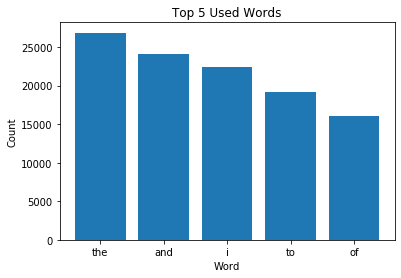

In [76]:
import matplotlib.pyplot as plt

%matplotlib inline

xValue = []

yValue = []

for tup in top5words:

   xValue.append(tup[1])

   yValue.append(int(tup[0]))

# Plot the data

topN = list(range(1,6))

plt.xlabel('Word')

plt.ylabel('Count')

plt.title('Top 5 Used Words')

plt.bar(topN,yValue)

plt.xticks()

plt.xticks(topN, xValue)

plt.show()